In [31]:
import matplotlib.pyplot as plt
import numpy as np

In [33]:
class KMeans:
    """
    Algoritmo de clustering K-Means

    Parametros:
        k (int): Número de clusters a encontrar (por defecto 3)
        max_iter (int): Número maximo de iteraciones (por defecto 100)
        centroids (numpy.ndarray): Cordenadas iniciales del centroides (por defecto ninguna)
    """
    def __init__(self, k=3, max_iter=100, centroids = None):
        """
        Constructor de objetos kMeans

        Parametros:
            k (int): Número de cluster
            max_iter (int): Número maximo de iteraciones
        """
        self.k = k
        self.max_iter = max_iter
        self.centroids = centroids

    def distancia_euclideana(self, p1, p2):
        """
        Calcula la distancia Euclideana entre dos puntos.

        Parametros:
            point1 (numpy.ndarray): Primer punto
            point2 (numpy.ndarray): Segundo punto

        Returns:
            float: La distancia euclideana entre los dos puntos
        """
        return np.sqrt(np.sum((p1 - p2)**2))

    def distancia_manhattan(self, point1, point2):
        """
        Calcula la distancia de Manhattan entre dos puntos

        Parametros:
            point1 (numpy.ndarray): Primer punto.
            point2 (numpy.ndarray): Segundo punto

        Returns:
            float: Distancia de Manhattan entre dos puntos
        """
        return np.sum(np.abs(point1 - point2))

    def distancia_mahalanobis(self, point1, point2, covariance_matrix):
        """
        Cacula la distancia de Mahalanobis entre dos puntos

        Parametros:
            point1 (numpy.ndarray): Primer punto.
            point2 (numpy.ndarray): Segundo punto.
            covariance_matrix (numpy.ndarray): Matrix de covarancia de los datos.

        Returns:
            float: La distancia de Mahalanobis entre dos puntos
        """
        diff = point1 - point2
        return np.sqrt(diff @ np.linalg.inv(covariance_matrix) @ diff.T)

    def calcular_centroides(self, points, labels):
        """
        Calcula los centroides de la nube de puntos dada por la asignación en la variable labels

        Parametros:
            points (numpy.ndarray): Nube de puntos
            labels (numpy.ndarray): Cluster asignado para cada punto

        Returns:
            numpy.ndarray: Centroides de cada cluster
        """

        centroids = np.zeros((self.k, points.shape[1]))
        for i in range(self.k):
            cluster_points = points[labels == i]
            if len(cluster_points) > 0:
              centroids[i] = np.mean(cluster_points, axis=0)
        return centroids

    def run(self, points, tipo_distance='euclidean'):
        """
        Ejecuta un algoritmo K-Means dado la nube de puntos recibida como parametro

        Parametros:
            points (numpy.ndarray): Nube de puntos
            tipo_distance (str): Tipo de distancia a utilizar ('euclidean', 'manhattan', or 'mahalanobis'). Por defecto  'euclidean'.

        Returns:
            numpy.ndarray: El cluster asignado a cada grupo
        """

        indices = np.random.choice(points.shape[0], self.k, replace=False)
        self.centroids = points[indices]

        for _ in range(self.max_iter):
            labels = np.zeros(points.shape[0], dtype=int)
            for i, point in enumerate(points):
                if tipo_distance == 'euclidean':
                    distances = [self.distancia_euclideana(point, centroid) for centroid in self.centroids]
                elif tipo_distance == 'manhattan':
                    distances = [self.distancia_manhattan(point, centroid) for centroid in self.centroids]
                elif tipo_distance == 'mahalanobis':
                    covariance_matrix = np.cov(points, rowvar=False)
                    distances = [self.distancia_mahalanobis(point, centroid, covariance_matrix) for centroid in self.centroids]
                else:
                    raise ValueError("Tipo de distancia no disponible")
                labels[i] = np.argmin(distances)

            new_centroids = self.calcular_centroides(points, labels)

            if np.array_equal(self.centroids, new_centroids):
                break

            self.centroids = new_centroids
        return labels

In [34]:
def dibujar2D (points, centroids, labels):
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.scatter(points[:, 0], points[:, 1], c='blue', label='Puntos')
    plt.title('Antes de kmeans')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.scatter(points[:, 0], points[:, 1], c=labels, cmap='viridis', label='Puntos')
    plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='*', s=200, label='Centroides finales')
    plt.title('Despues de kmeans')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend()

    plt.tight_layout()
    plt.show()

def dibujar3D (points, centroids, labels):
    fig = plt.figure(figsize=(10, 5))
    ax1 = fig.add_subplot(121, projection='3d')
    ax1.scatter(points[:, 0], points[:, 1], points[:, 2], c='blue', label='Puntos')
    ax1.set_title('Antes de kmeans')
    ax1.set_xlabel('X')
    ax1.set_ylabel('Y')
    ax1.set_zlabel('Z')
    ax1.legend()


    # Plot the points and final centroids
    ax2 = fig.add_subplot(122, projection='3d')
    ax2.scatter(points[:, 0], points[:, 1], points[:, 2], c=labels, cmap='viridis', label='Puntos')
    ax2.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2], c='red', marker='*', s=200, label='Centroides finales')
    ax2.set_title('Despues de kmeans')
    ax2.set_xlabel('X')
    ax2.set_ylabel('Y')
    ax2.set_zlabel('Z')
    ax2.legend()

    plt.tight_layout()
    plt.show()

In [35]:
# Ejemplo de uso (datos con 2 caracteristicas) usando distancia euclideana
points = np.array([[1, 2], [1.5, 1.8], [5, 8], [8, 8], [1, 0.6], [9, 11]])
kmeans = KMeans(k=2)
labels = kmeans.run(points)
print(labels)
print(kmeans.centroids)

[1 1 0 0 1 0]
[[7.33333333 9.        ]
 [1.16666667 1.46666667]]


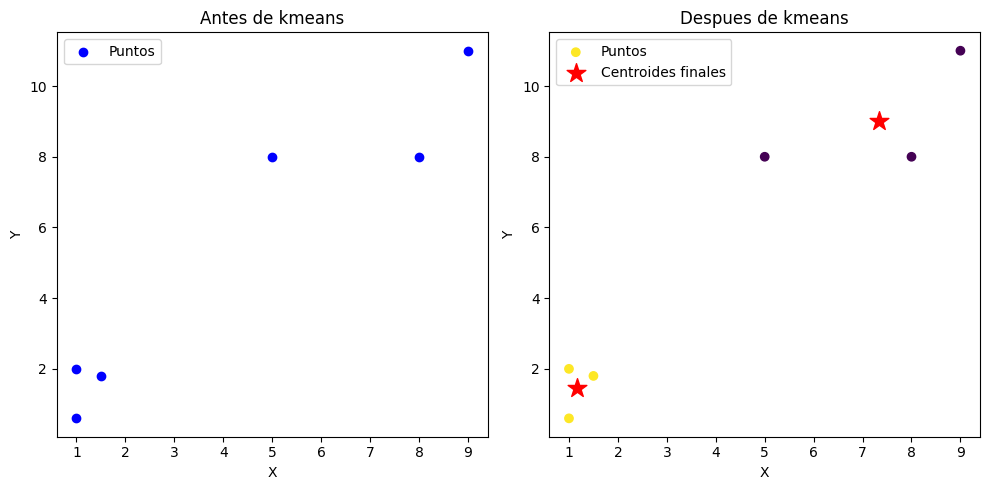

In [36]:
dibujar2D(points, kmeans.centroids, labels)

In [37]:
# Ejemplo de uso (datos con 2 caracteristicas) usando distancia de Manhattan
points = np.array([[1, 2], [1.5, 1.8], [5, 8], [8, 8], [1, 0.6], [9, 11]])
kmeans = KMeans(k=2)
labels = kmeans.run(points, tipo_distance="mahalanobis")
print(labels)
print(kmeans.centroids)

[1 1 0 0 1 0]
[[7.33333333 9.        ]
 [1.16666667 1.46666667]]


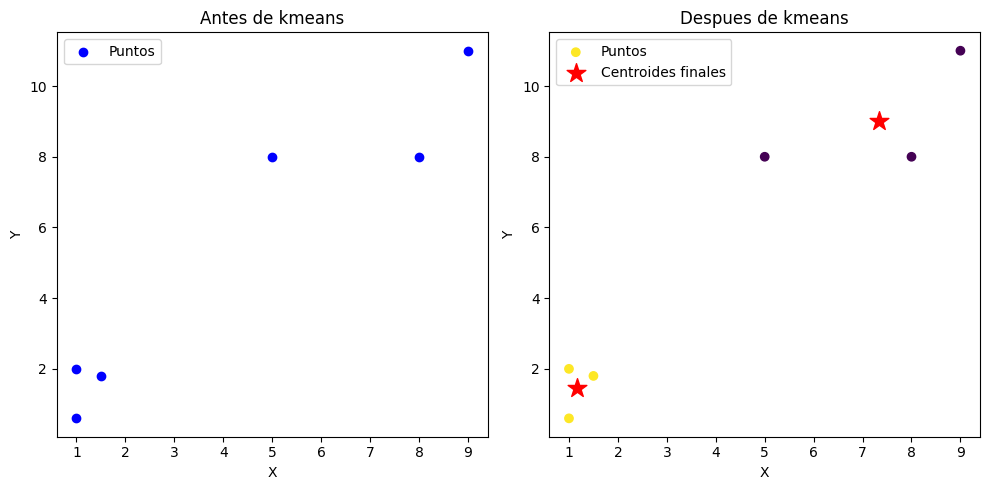

In [38]:
dibujar2D(points, kmeans.centroids, labels)

In [39]:
# Ejemplo de uso (datos con 3 caracteristicas)
points = np.array([[1, 2, 0], [1.5, 1.8, 6], [-1, 5, 8], [3.2, 8, 8], [3, 1, 0.6], [-8, 9, 11]])
kmeans = KMeans(k=3)
labels = kmeans.run(points)
print(labels)
print(kmeans.centroids)

[1 0 0 0 2 0]
[[-1.075  5.95   8.25 ]
 [ 1.     2.     0.   ]
 [ 3.     1.     0.6  ]]


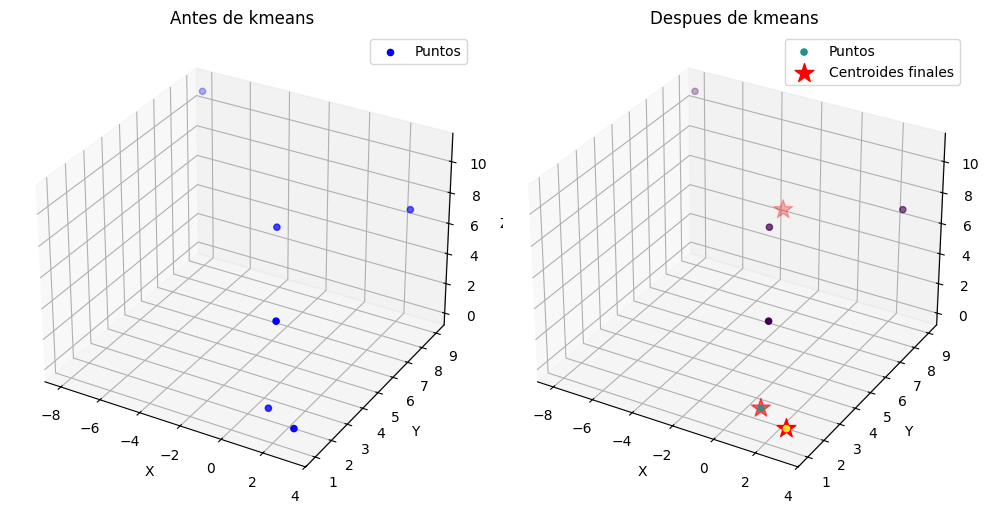

In [40]:
dibujar3D(points, kmeans.centroids, labels)

In [41]:
from sklearn.datasets import make_blobs
points, y = make_blobs(n_samples = 100,n_features = 2,centers = 4,random_state = 23)

In [42]:
kmeans = KMeans(k=3)
labels = kmeans.run(points)
print(labels)
print(kmeans.centroids)

[2 2 2 0 2 2 0 0 1 1 2 1 2 0 0 1 1 0 2 1 2 2 1 2 0 1 2 2 1 0 1 0 2 1 0 1 1
 1 0 2 2 2 1 0 2 1 1 0 0 1 2 2 2 1 2 0 2 2 2 2 1 2 2 0 1 2 0 2 2 2 2 2 1 2
 0 0 2 0 0 2 2 2 2 2 2 2 0 1 0 0 1 2 0 1 2 2 2 2 2 2]
[[ 0.27337172  9.05348624]
 [ 5.17388438 -3.93064051]
 [-6.07568708  0.66320925]]


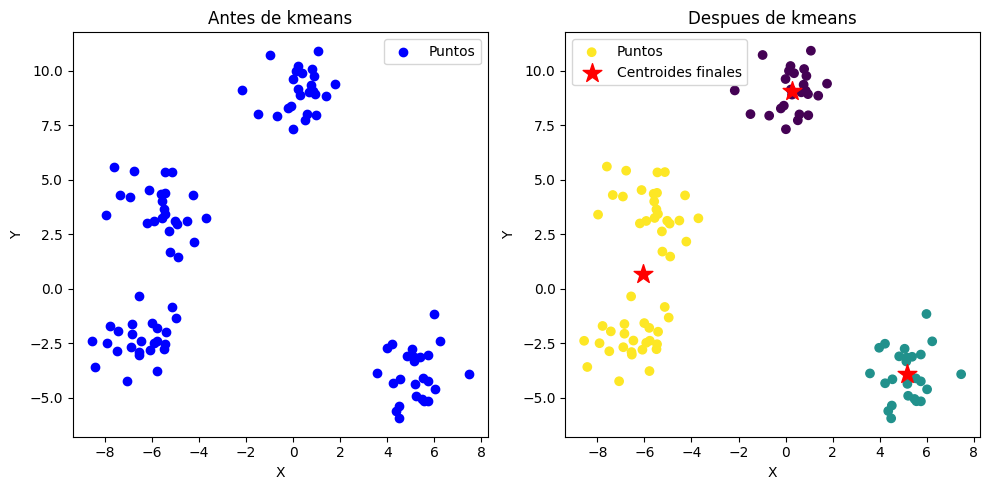

In [43]:
dibujar2D(points, kmeans.centroids, labels)

#*EXPERIMENTO1*#

Iteraciones: 10, Centroides:
 [[ 0.2390567   8.91889696]
 [-5.52736899  3.72751671]
 [ 5.20723013 -4.39033512]]


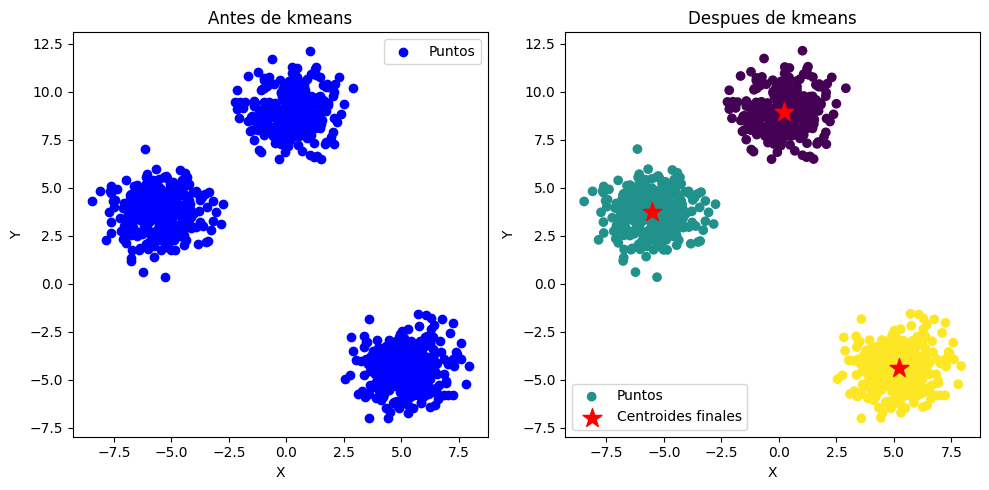

Iteraciones: 100, Centroides:
 [[-5.52736899  3.72751671]
 [ 0.2390567   8.91889696]
 [ 5.20723013 -4.39033512]]


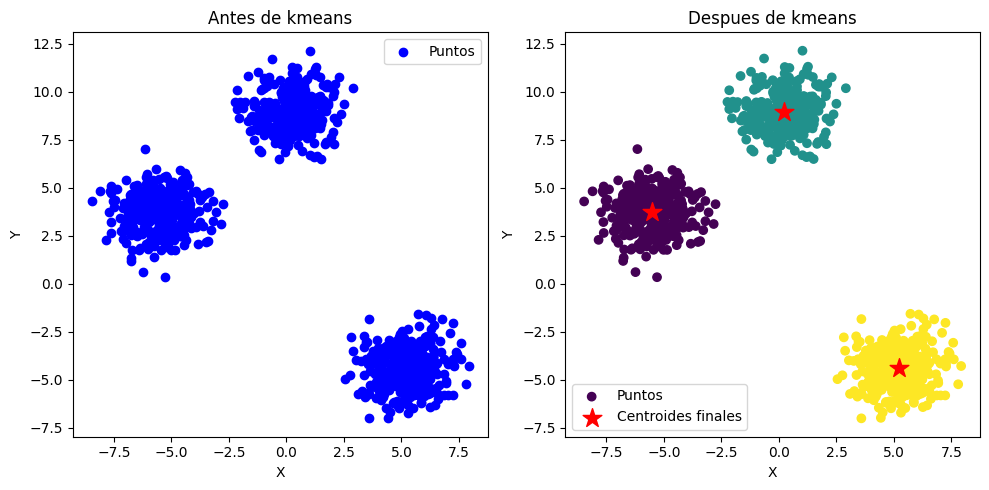

Iteraciones: 1000, Centroides:
 [[-5.52736899  3.72751671]
 [ 0.2390567   8.91889696]
 [ 5.20723013 -4.39033512]]


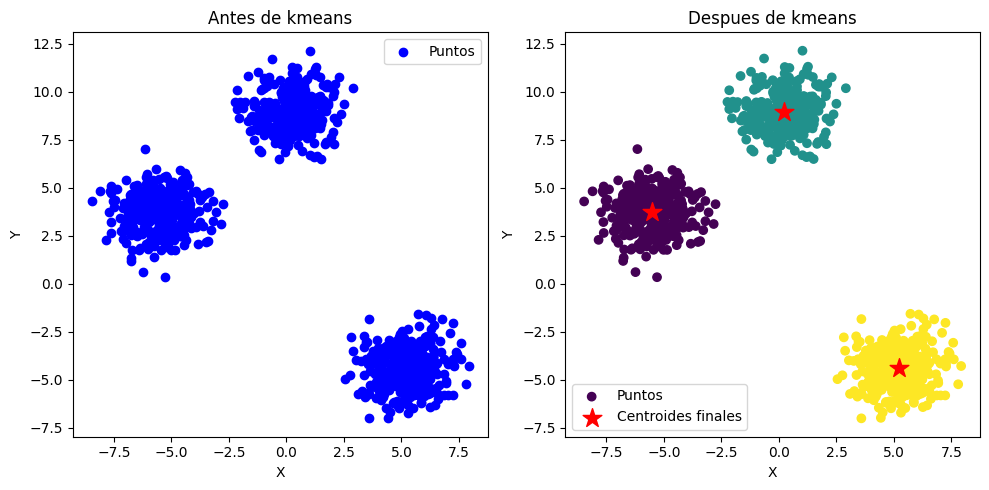

Iteraciones: 10000, Centroides:
 [[ 0.2390567   8.91889696]
 [ 5.20723013 -4.39033512]
 [-5.52736899  3.72751671]]


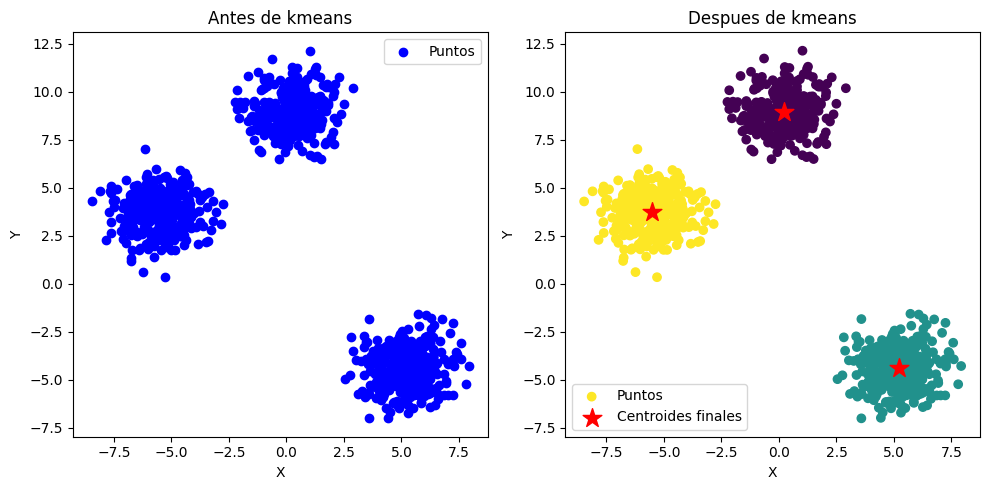

In [44]:
from sklearn.datasets import make_blobs

iteraciones = [10, 100, 1000, 10000]

for max_iter in iteraciones:
    points, _ = make_blobs(n_samples=1000, n_features=2, centers=3, random_state=23)
    kmeans = KMeans(k=3, max_iter=max_iter)
    labels = kmeans.run(points)
    print(f"Iteraciones: {max_iter}, Centroides:\n", kmeans.centroids)
    dibujar2D(points, kmeans.centroids, labels)


Iteraciones: 10, Centroides:
 [[ 0.26593597  9.19055203  5.96210219]
 [ 0.41681196  8.38145203  4.39520878]
 [-5.42954798 -3.92225124  3.00518746]]


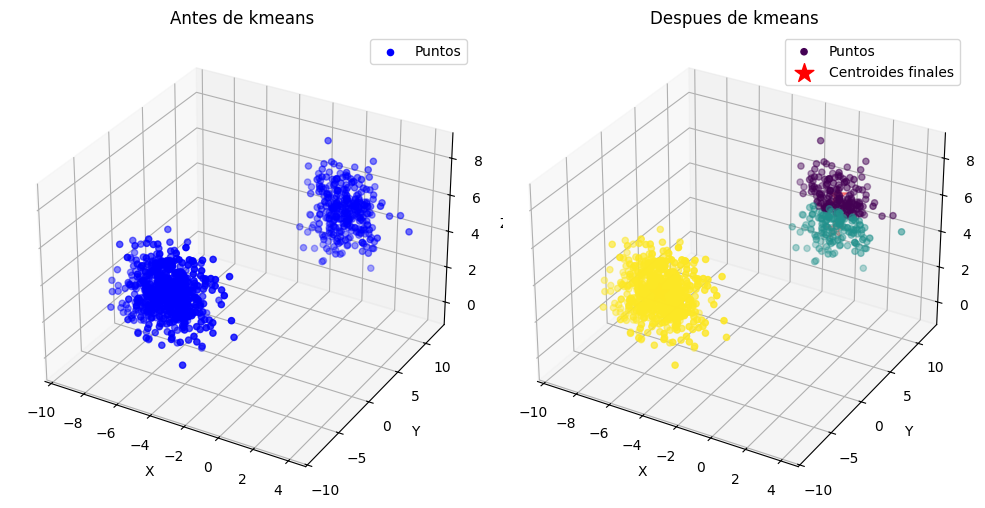

Iteraciones: 100, Centroides:
 [[-5.42954798 -3.92225124  3.00518746]
 [ 0.26593597  9.19055203  5.96210219]
 [ 0.41681196  8.38145203  4.39520878]]


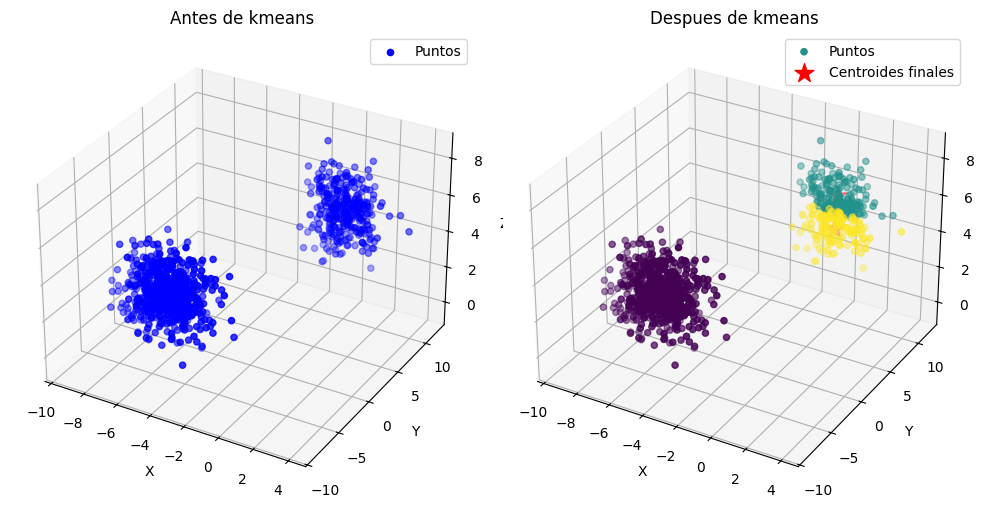

Iteraciones: 1000, Centroides:
 [[-6.60269143 -2.21779638  2.2355186 ]
 [-4.28425363 -5.58624427  3.75658525]
 [ 0.33414637  8.82476131  5.25371625]]


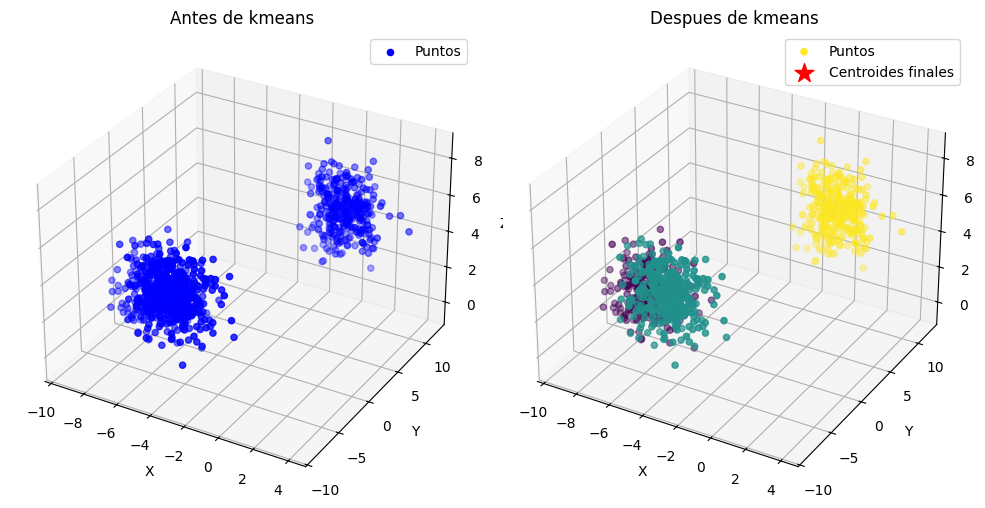

Iteraciones: 10000, Centroides:
 [[-6.60269143 -2.21779638  2.2355186 ]
 [ 0.33414637  8.82476131  5.25371625]
 [-4.28425363 -5.58624427  3.75658525]]


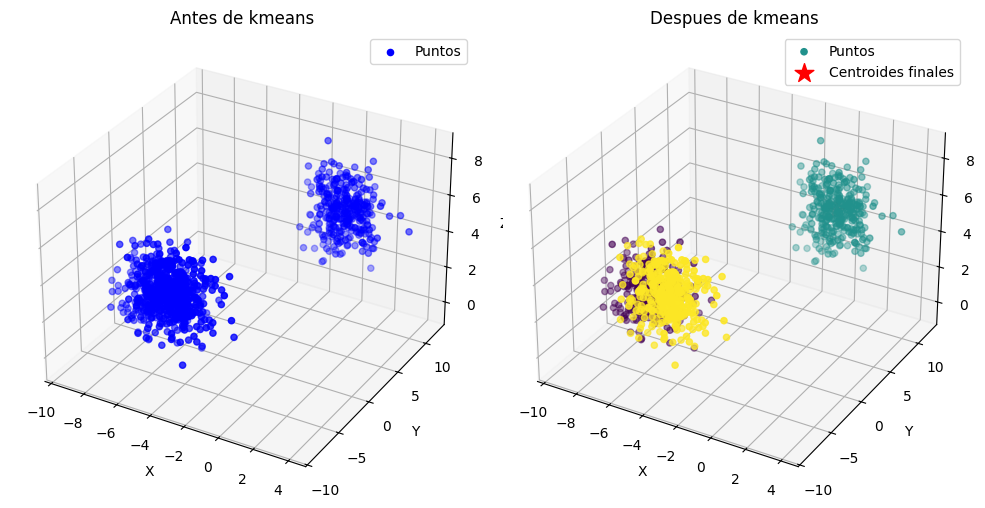

In [47]:
from sklearn.datasets import make_blobs
points, _ = make_blobs(n_samples=1000, n_features=3, centers=3, random_state=23)
iteraciones = [10, 100, 1000, 10000]
for max_iter in iteraciones:
    kmeans = KMeans(k=3, max_iter=max_iter)
    labels = kmeans.run(points)
    print(f"Iteraciones: {max_iter}, Centroides:\n", kmeans.centroids)
    dibujar3D(points, kmeans.centroids, labels)



In [48]:
from sklearn.datasets import make_blobs
points, _ = make_blobs(n_samples=1000, n_features=10, centers=3, random_state=23)
iteraciones = [10, 100, 1000, 10000]
for max_iter in iteraciones:
    kmeans = KMeans(k=3, max_iter=max_iter)
    labels = kmeans.run(points)
    print(f"Iteraciones: {max_iter}, Centroides:\n", kmeans.centroids)


Iteraciones: 10, Centroides:
 [[-10.16395501   7.71305848   7.65556713  -3.39127842   1.80978659
    9.5344582    6.87961345  -8.90385573  -4.26369009  -4.0633503 ]
 [  3.36018073   5.62796757  -1.25739557  -7.16605708   1.5435671
   -1.68126226  -4.14868522  -2.59513848   4.80092467  -1.6304298 ]
 [ -9.77134481   7.43793331   7.69799633  -4.89371583   1.73602913
    9.76334198   6.85383123  -8.23809124  -3.86942975  -4.31085584]]
Iteraciones: 100, Centroides:
 [[  6.48009773   2.62395011  -7.64736311 -10.62727744   8.64084036
   -7.21321862  -1.52206742  -3.48584295   7.78429386  -1.3266823 ]
 [  6.34470788   2.30313173  -7.94233704  -9.29407319   9.00576064
   -7.15077072  -1.62811113  -2.71981471   6.85650047  -1.50573837]
 [ -4.83620978   8.19286568   6.46459751  -4.18937534  -1.97258721
    6.71080572   0.06703051  -5.35597917  -0.90333291  -3.00224447]]
Iteraciones: 1000, Centroides:
 [[ -4.83620978   8.19286568   6.46459751  -4.18937534  -1.97258721
    6.71080572   0.06703051  

In [49]:
from sklearn.datasets import make_blobs
points, _ = make_blobs(n_samples=1000, n_features=100, centers=3, random_state=23)
iteraciones = [10, 100, 1000, 10000]
for max_iter in iteraciones:
    kmeans = KMeans(k=3, max_iter=max_iter)
    labels = kmeans.run(points)
    print(f"Iteraciones: {max_iter}, Centroides:\n", kmeans.centroids)


Iteraciones: 10, Centroides:
 [[-8.79961358e+00  4.79252980e+00 -7.56944889e+00  5.99124547e+00
   8.83878068e+00 -3.14593713e+00 -3.69408689e+00  1.94565810e+00
   3.89832283e+00 -8.97035035e+00  2.38990136e+00 -6.43340326e+00
  -8.41943309e+00 -3.64081810e+00 -1.86708755e+00 -2.25969400e+00
   4.70056453e+00  1.98163091e-01 -2.96206797e+00 -7.07722419e-01
   8.85122209e-01  6.57616173e+00 -2.97843066e+00  5.66072617e+00
   2.88137302e+00  7.42107484e+00 -1.72908971e+00 -6.42584635e+00
  -8.24188431e+00  1.22085583e+00  9.65302629e+00 -4.22326416e+00
  -2.25834754e+00  6.45040904e+00 -2.18730608e+00  7.66069986e+00
  -9.68065321e+00  7.64800927e+00 -4.07737300e+00  9.70382237e+00
   5.46887728e+00  6.09330071e+00 -5.21877496e-01 -4.09584241e+00
  -3.45933533e+00  7.78006043e+00 -1.38884928e+00 -9.80398159e+00
   2.47537389e+00  2.88283055e+00  2.29766796e+00 -8.32364328e+00
  -6.35376770e+00  5.55747688e+00  1.72083886e+00  3.74081078e+00
  -8.62033414e+00  1.24624077e+00 -4.71431360e

k: 2, Centroides:
 [[ 3.96089429  2.48215304  3.41851499]
 [-4.28843049 -5.82089341  4.55728182]]


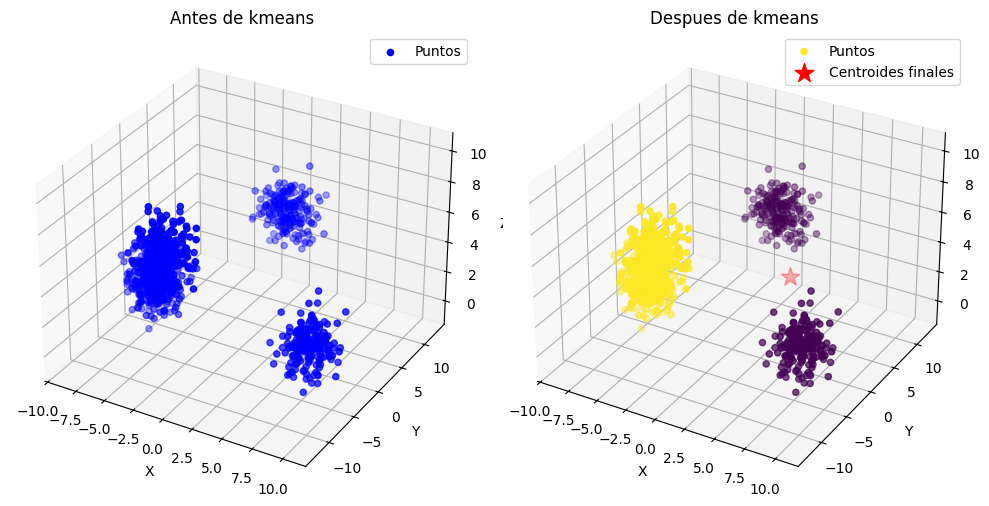

k: 3, Centroides:
 [[ 0.33469749  8.86383896  5.15222192]
 [ 7.58709109 -3.89953289  1.68480805]
 [-4.28843049 -5.82089341  4.55728182]]


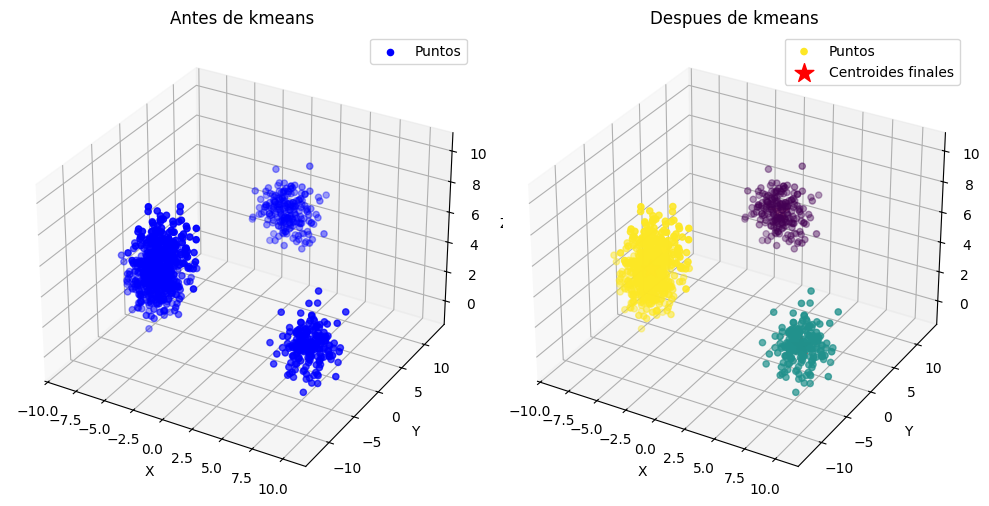

k: 5, Centroides:
 [[ 7.58709109 -3.89953289  1.68480805]
 [-4.44052698 -5.55462807  3.65748551]
 [ 0.33469749  8.86383896  5.15222192]
 [-6.58239074 -2.14394777  2.40311976]
 [-1.80201969 -9.82800453  7.62277291]]


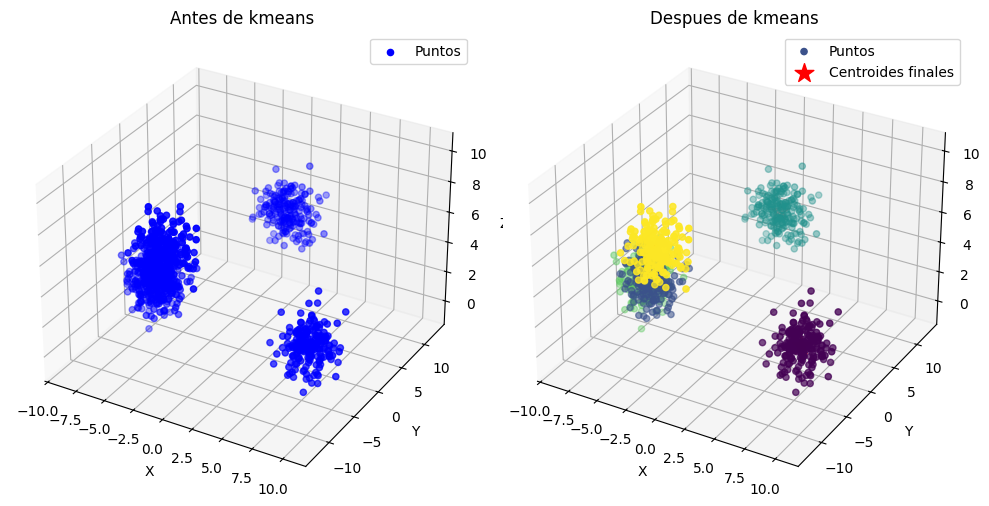

k: 10, Centroides:
 [[-2.321227   -9.9487527   8.38328508]
 [-1.44424658 -9.74479991  7.09872252]
 [-7.37693052 -1.56520821  2.03365198]
 [-5.28185929 -5.68193571  3.6324294 ]
 [-6.16890568 -1.59702186  3.6227198 ]
 [-3.62921335 -5.45990196  3.72641319]
 [-5.61148959 -2.12852098  1.9517153 ]
 [-7.17759889 -3.29215286  2.15373142]
 [ 7.58709109 -3.89953289  1.68480805]
 [ 0.33469749  8.86383896  5.15222192]]


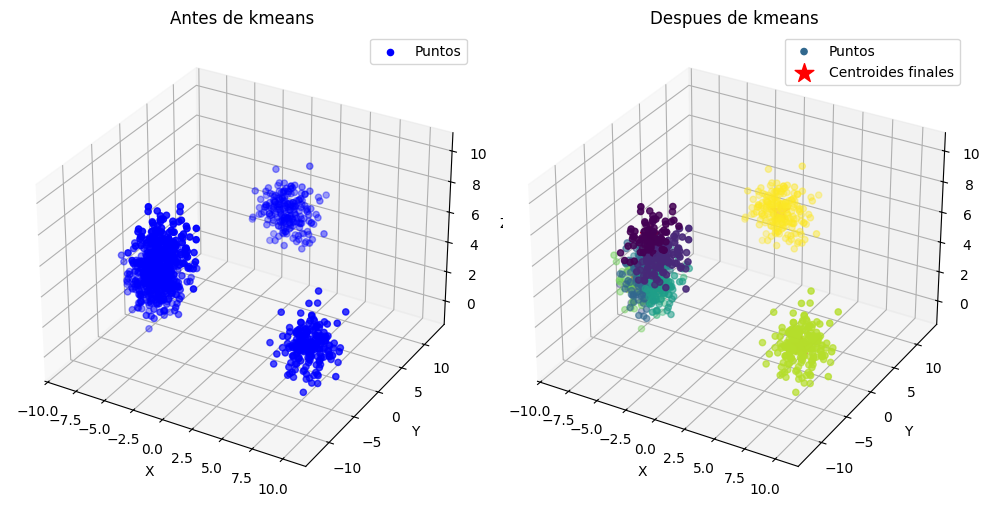

In [54]:
from sklearn.datasets import make_blobs
points, _ = make_blobs(n_samples=1000, n_features=3, centers=5, random_state=23)
valores_k = [2, 3, 5, 10]
for k in valores_k:
    kmeans = KMeans(k=k, max_iter=1000)
    labels = kmeans.run(points)
    print(f"k: {k}, Centroides:\n", kmeans.centroids)
    dibujar3D(points, kmeans.centroids, labels)



Usando distancia: euclidiana


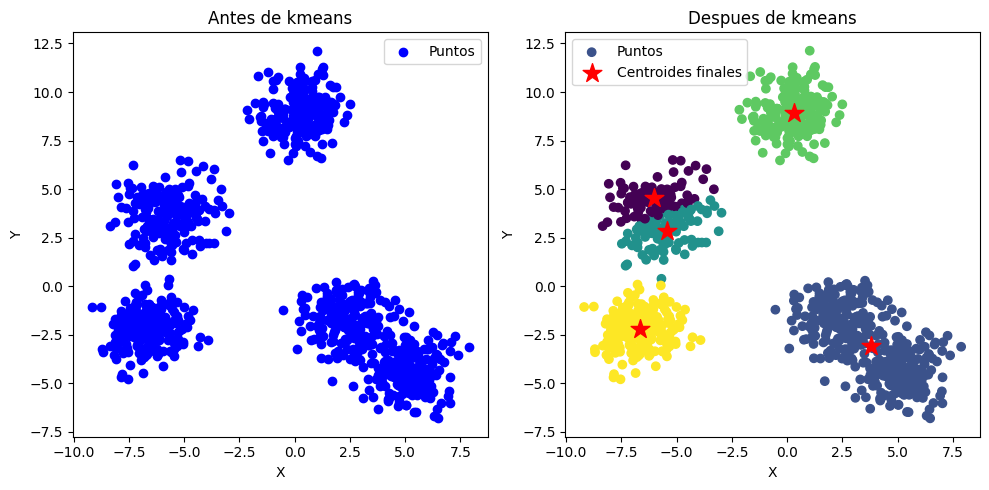


Usando distancia: manhattan


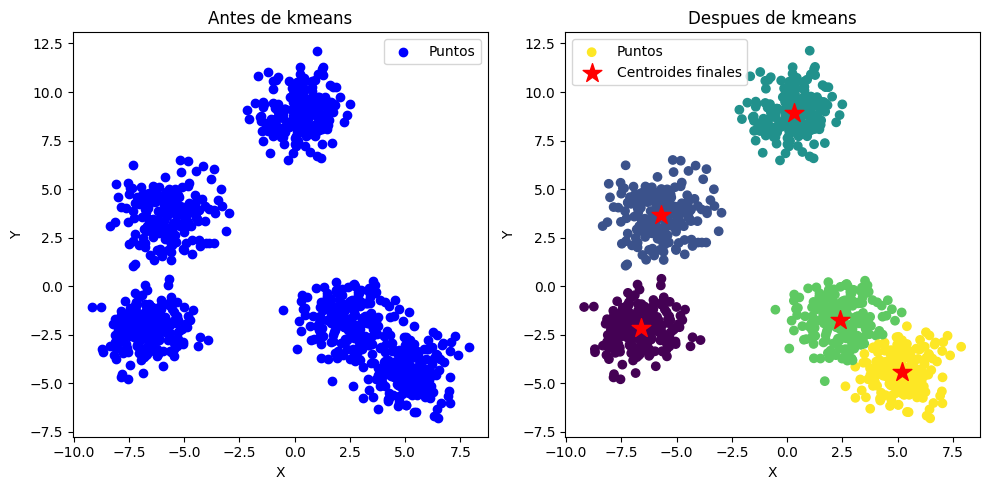


Usando distancia: mahalanobis


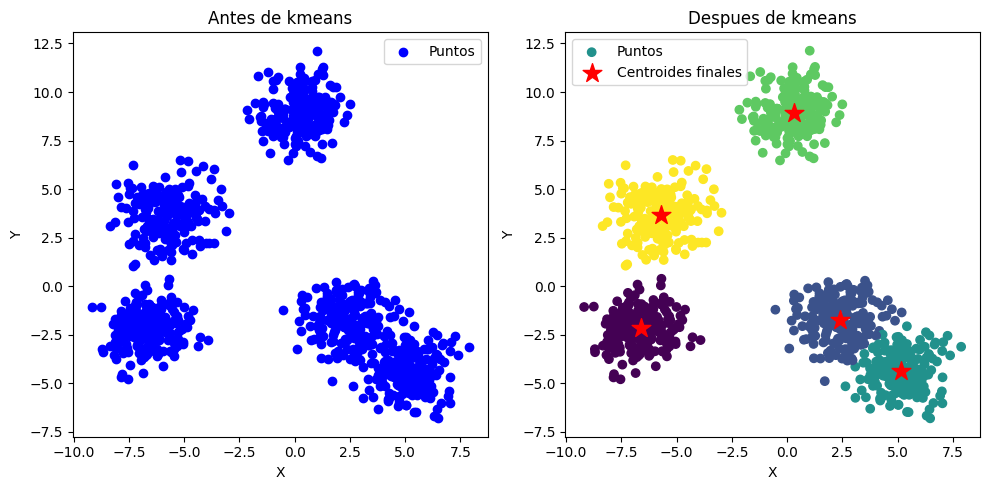

In [58]:
from sklearn.datasets import make_blobs
import numpy as np

points, _ = make_blobs(n_samples=1000, n_features=2, centers=5, random_state=23)

def calcular_distancia(puntos, centroides, tipo):
    if tipo == "euclidiana":
        return np.linalg.norm(puntos[:, np.newaxis] - centroides, axis=2)
    elif tipo == "manhattan":
        return np.sum(np.abs(puntos[:, np.newaxis] - centroides), axis=2)
    elif tipo == "mahalanobis":
        cov_inv = np.linalg.inv(np.cov(points.T))
        return np.array([np.sqrt(np.diag((p - centroides) @ cov_inv @ (p - centroides).T)) for p in points])
    else:
        raise ValueError("Distancia no soportada")

distancias = ["euclidiana", "manhattan", "mahalanobis"]

for dist in distancias:
    print(f"\nUsando distancia: {dist}")

    kmeans = KMeans(k=5, max_iter=1000)
    labels = kmeans.run(points)

    dibujar2D(points, kmeans.centroids, labels)



In [57]:
from sklearn.datasets import make_blobs

points, _ = make_blobs(n_samples=1000, n_features=2, centers=3, random_state=23)

max_iteraciones = 10000

historial_centroides = []

kmeans = KMeans(k=3, max_iter=max_iteraciones)
labels = kmeans.run(points)

for i in range(max_iteraciones):
    kmeans = KMeans(k=3, max_iter=i + 1)
    labels = kmeans.run(points)
    historial_centroides.append(kmeans.centroids.copy())

    if i > 0 and (historial_centroides[i] == historial_centroides[i - 1]).all():
        break

for i, centroides in enumerate(historial_centroides):
    print(f"Iteración {i+1}:\n", centroides)


Iteración 1:
 [[ 5.20723013 -4.39033512]
 [-3.23736437  6.97646367]
 [-2.18019435  5.8275867 ]]
Iteración 2:
 [[ 4.90889392 -4.33555326]
 [-2.63983349  6.32709843]
 [ 6.62175526 -4.65007673]]
Iteración 3:
 [[ 5.20723013 -4.39033512]
 [ 0.2390567   8.91889696]
 [-5.52736899  3.72751671]]
Iteración 4:
 [[ 5.20723013 -4.39033512]
 [ 0.2390567   8.91889696]
 [-5.52736899  3.72751671]]
